<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

#  Machine Learning: Unsupervised Learning

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

### Principal Component Analysis:-
- Unsupervised machine learning algorithm
- Non-parametric statistical technique
- Idea is to represent the data in lower dimension by preserving largest variance
- PCA creates new synthetic features to represent the original features by projecting the data in the direction of largest variance.
- PCs are linear combination of features which determines magnitude and direction of maximum variance
- PCs are not correlated to each other
- The number of PCs is equal to the number of original features

### Applications of PCA:-
- Dimensionality reduction
- Improving signal to noise ratio
- Helps in removing correlation between variables
- To speed up the convergence of Neural networks

### Clustering:-
- Used to discovers hidden structure and patterns in uncategorized data.
- Finds natural clusters ( groups) existing in the data.
- Number of clusters and their granularity can be adjusted.


### Types of Clustering:-
1. Hierachical Clustering
   - Agglomerative 
   - Divisive
2. Non Hierarchical Clustering
   - KMeans
   - DBSCAN

### Applications of Clustering:-
- Customer segmentation
- Market research
- Recommendation engine
- Pattern recognition
- Image segmentation
- Social network analysis




## Data Description: 
The Data set contains information about various attributes like education, gender, family status etc,  of people from diverse backgrounds.

### Attribute Information:
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov etc
- Fnlwgt: Sample weight.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school etc
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated etc
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial etc
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Black etc
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada etc

### Import all necessary libraries

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

### Q1. Load the CSV file (i.e adult.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/MyDrive/adult.csv')
#df.head()

In [4]:
## Checking the shape and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              2021 non-null   int64 
 1   workclass        2021 non-null   object
 2   fnlwgt           2021 non-null   int64 
 3   education        2021 non-null   object
 4   educational-num  2021 non-null   int64 
 5   marital-status   2021 non-null   object
 6   occupation       2021 non-null   object
 7   relationship     2021 non-null   object
 8   race             2021 non-null   object
 9   gender           2021 non-null   object
 10  capital-gain     2021 non-null   int64 
 11  capital-loss     2021 non-null   int64 
 12  hours-per-week   2021 non-null   int64 
 13  native-country   2021 non-null   object
 14  income           2021 non-null   object
dtypes: int64(6), object(9)
memory usage: 237.0+ KB


- We have 2021 intances and 15 columns in the dataset.
- There are no missing values in the dataset.
- We have around 9 object type variables and rest all interger datatype variables.

### Q2. At a first glance of our dataset, we can see that missing values are present in the form of "?" in "workclass","occupation", "native-country". Remove them.

In [5]:
## Encode '?' as "NAN"
df[df == '?'] = np.nan

## Now filling "NAN" with the most frequent value- the mode.
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [6]:
print("The missing value of each columns of the dataframe \n",(df.isnull().sum()))

The missing value of each columns of the dataframe 
 age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


### Q3.Check the statistical summary of the data frame and write your findings.

In [8]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,38.573973,185621.657100,10.031667,1371.680851,85.367145,40.533399
std,13.721887,99247.776981,2.681249,8927.426392,397.758747,12.129234
min,17.000000,13769.000000,1.000000,0.000000,0.000000,1.000000
25%,27.000000,115562.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,176520.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,235218.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,662460.000000,16.000000,99999.000000,3004.000000,99.000000


- Capital gain ranges between 0-99,999 dollars
- The maximum working hours per week is 99 hrs.
- On an average the value of age attribute is 38

In [9]:
df.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,2021,2021,2021,2021,2021,2021,2021,2021,2021
unique,6,16,7,14,6,5,2,34,2
top,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
freq,1485,628,939,400,825,1718,1357,1858,1535


- There are 9 Categorical features.
- Native-country has maximum number of unique categories i.e. 34 categories.
- But the native-country is highly biased toward the US which has frequency of 1858 out of total 2021(nearly 91%).

## Exploratory Data Analysis

### Using Visualization plots answer the following questions

### Q4. What is the general working hours in a week for an individual?

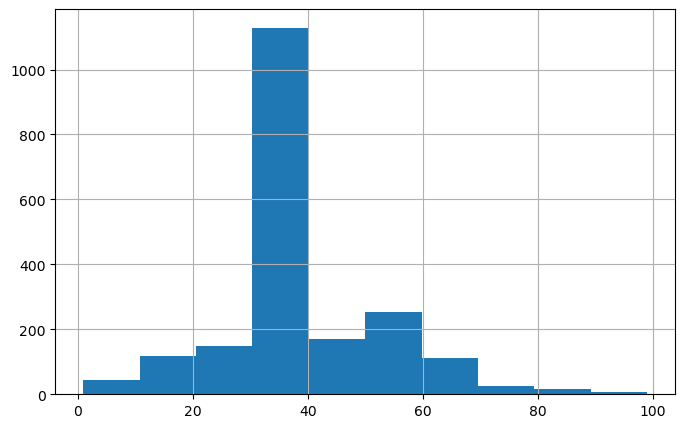

In [10]:
df['hours-per-week'].hist(figsize=(8,5))
plt.show()

- Most people work 30-40 hours per week, they are roughly 1200 people.
- There are also few people who works 80-100 hours per week and some less than 20 which is unusual.

### Q5. What are the different workclass that an individual may belong to?

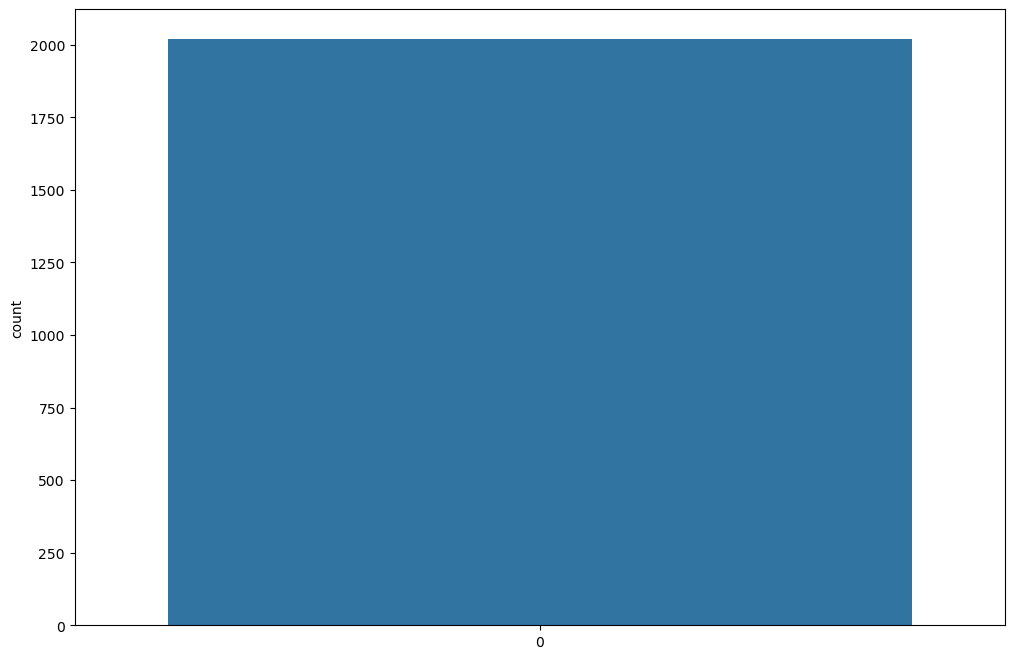

In [16]:
plt.figure(figsize = (12,8))
sns.countplot(df['workclass'])
plt.show()

- There are 6 unique categories present in the worclass attribute.
- Most of them belong to the private workclass around 75%.

### Q6. What are the different education level?

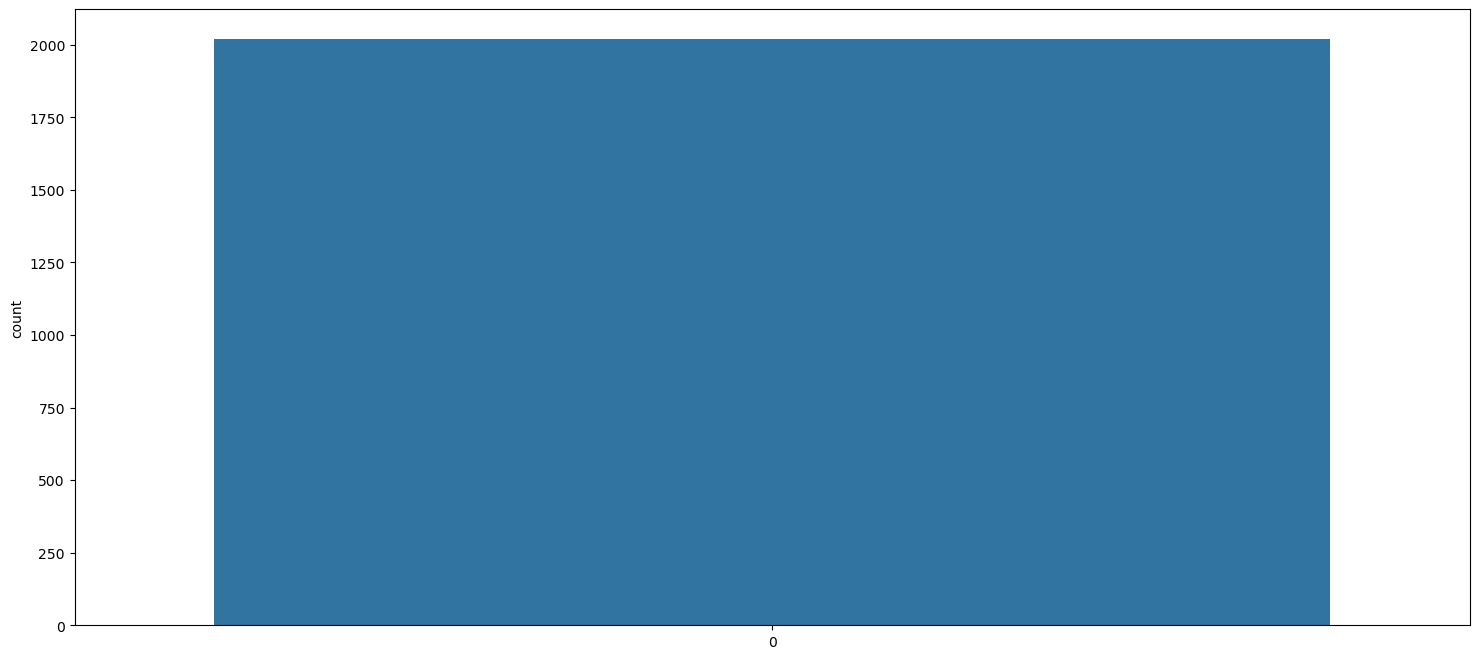

In [17]:
plt.figure(figsize = (18,8))
sns.countplot(df['education'])
plt.show()

- There are 16 unique categories present in the education attribute.
- HS-grad (650) has the maximum number of observations followed by some-college(430) and Bachelors(350).

### Q7. Comment on the marital status of the people.

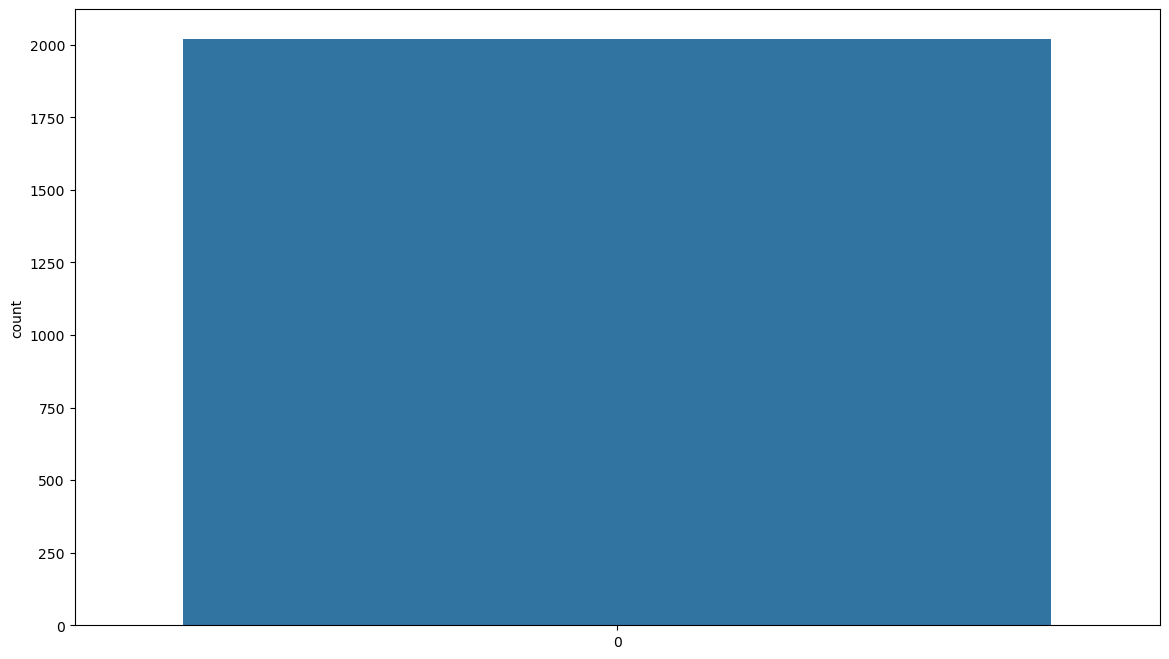

In [18]:
plt.figure(figsize = (14,8))
sns.countplot(df['marital-status'])
plt.show()

- marital-status attribute has 7 unique categories.
- Two of them are dominate over other categories(these are Never-married and married-civ-spouse.
- Married-civ-spouse has maximum number of samples.

### Q8. What is the gender distribution?

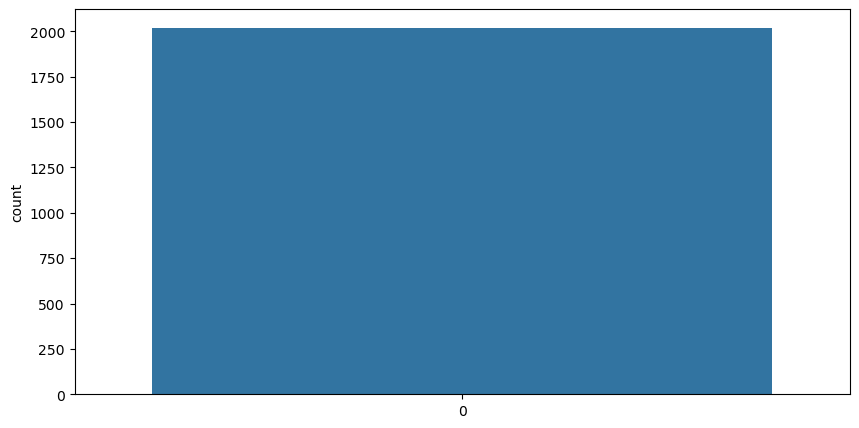

In [19]:
plt.figure(figsize = (10,5))
sns.countplot(df['gender'])
plt.show()

- Gender has 2 unique categories(male and female).
- But the frequency of male(1380) is higher than the female(750) categories.

## Let's perform some bivariate analysis

### Q9 a). Find the relationship between 'Age' and 'income'.

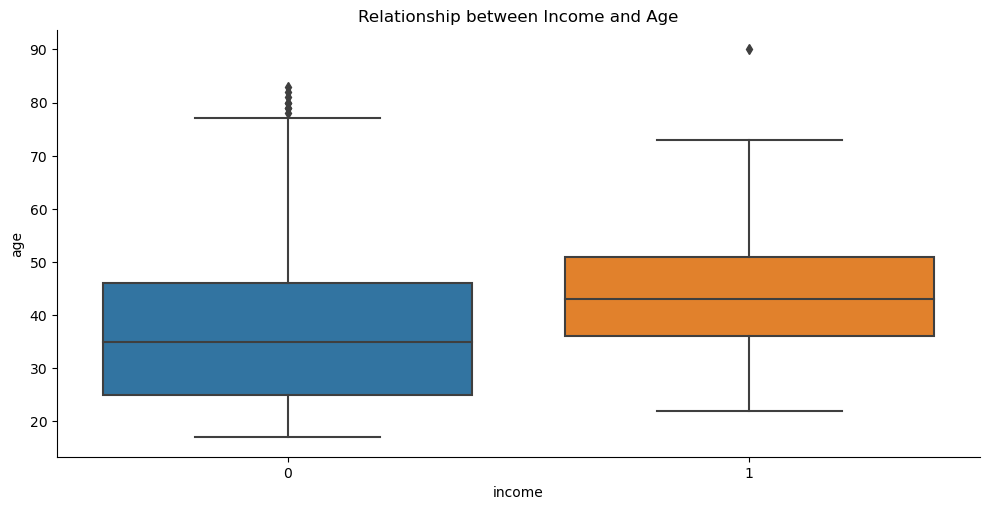

In [20]:
sns.catplot(data=df, x='income', y='age', kind= 'box', aspect=2)
plt.title('Relationship between Income and Age')
plt.show()

- Most of the people having income less than or equal to 50K are between age 25-45
- Most of the people having income more than 50K are between age 37-50

### Q9 b). Find whether people with more working hours per week tends to get more income?

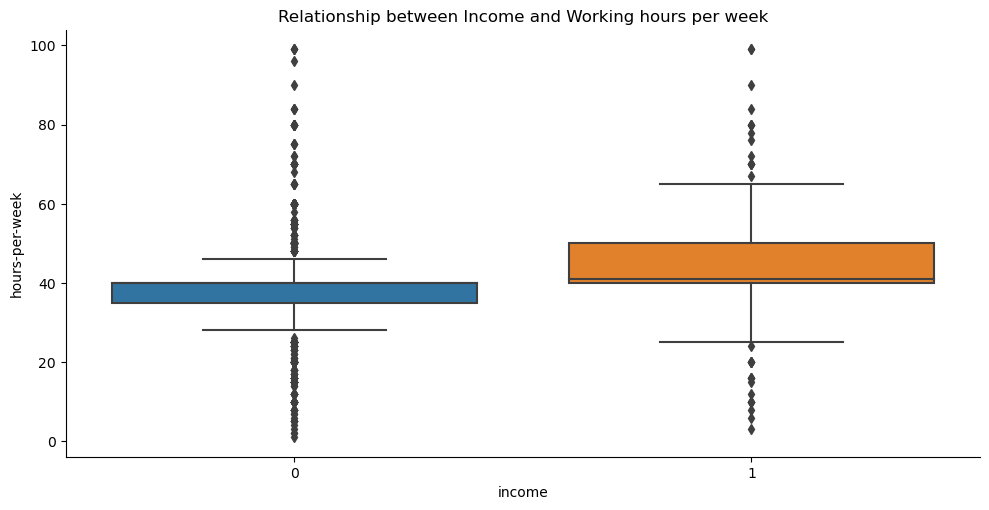

In [21]:
sns.catplot(data=df, x='income', y='hours-per-week', kind= 'box', aspect=2)
plt.title('Relationship between Income and Working hours per week')
plt.show()

- Income group who earns >50k has spend ~44 "hours-per-week".(long hours)
- Income group who earns <=50k has spend ~37 "hours-per-week".

### Q10. Find the relationship between "Workingclass" and "income"

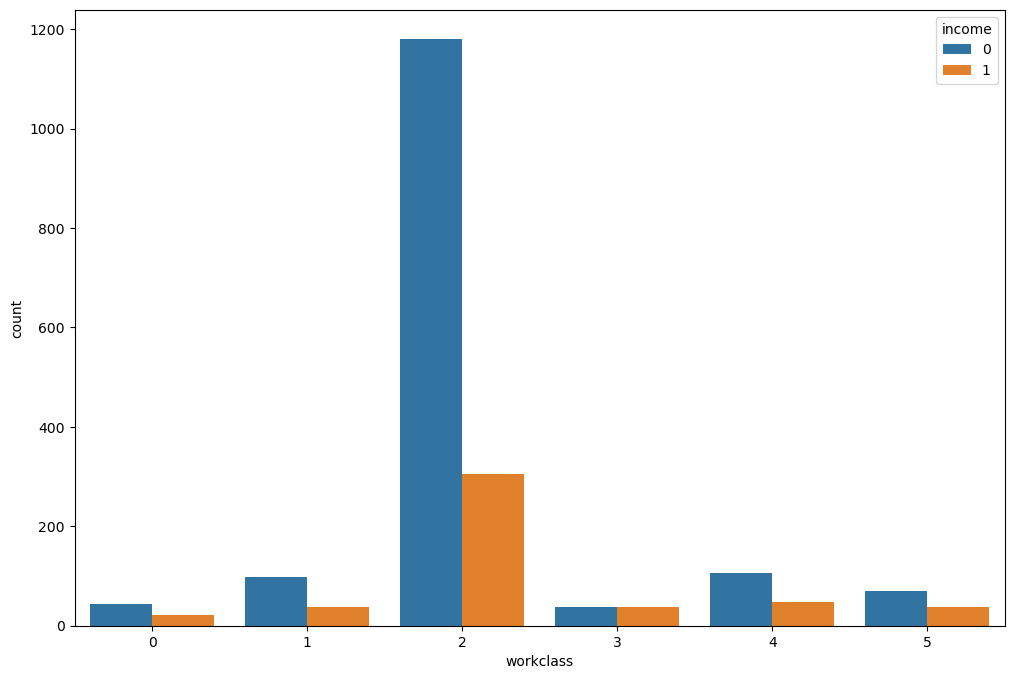

In [22]:
plt.figure(figsize = (12,8))
sns.countplot(data = df ,x='workclass',hue='income')
plt.show()

- In private workclass most of the people earn <=50k

### Q11. Does higher education means that the person will get higher income?

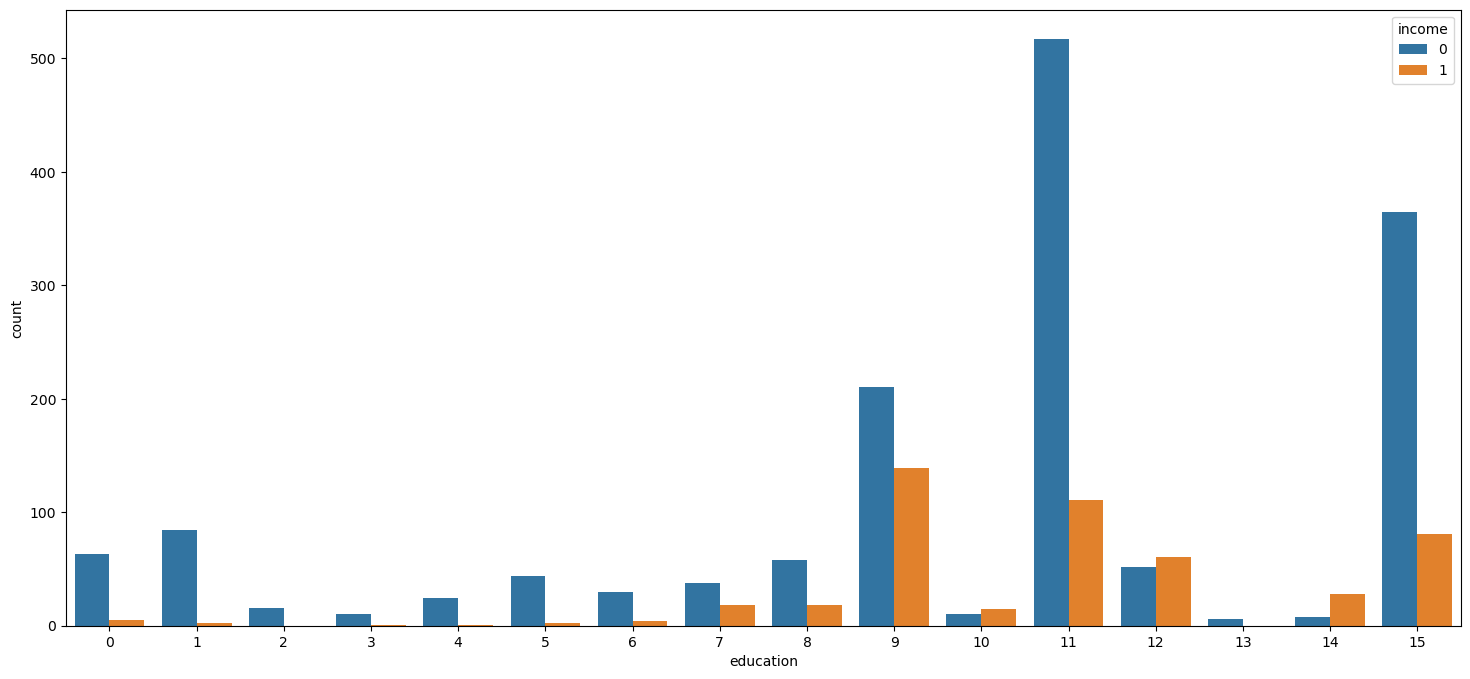

In [23]:
plt.figure(figsize = (18,8))
sns.countplot(data = df ,x='education',hue='income')
plt.show()

- Despite the fact that most of the categories fall under the HS-grad but the interesting thing is only 5.0% of all people belong to the income group 1(i.e. earns more than 50k)
- Categories such as 'Prof-school', 'Masters' & 'Doctorate' have people who earn more than 50k. 
- We can also infer that higher eduction may provide better earnings.

### Q12. Who has better chance to get income greater than 50K, Male or Female?

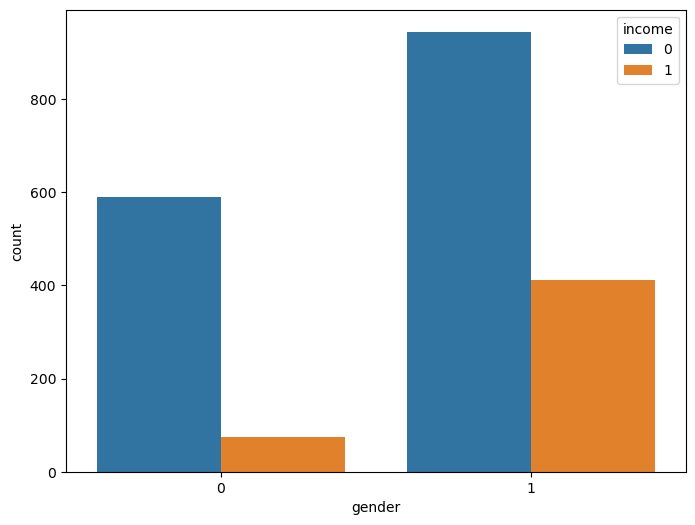

In [24]:
plt.figure(figsize = (8,6))
sns.countplot(data = df ,x='gender',hue='income')
plt.show()

- For "female" earning more than 50k is less.
- But for male, around 20.0% of all people earn more than 50k .

## Data preprocessing

### Q13. Encode the categorical features in the dataset and apply data standardization.

In [25]:
df_cat = df.select_dtypes(include='object')
#df_cat = df_cat.replace(to_replace ="?",value ="Private")

In [26]:
## Label encoding
le = LabelEncoder()
for col in df_cat:
    df[col] = le.fit_transform(df[col])

In [27]:
## Standardization
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

In [28]:
scaled_features_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,-0.989465,-0.220328,0.415027,-2.316842,-1.130972,0.889969,0.059056,0.959288,-1.899033,0.699510,-0.153686,-0.214674,-0.043987,0.253553,-0.562683
1,-0.041839,-0.220328,-0.965577,0.201763,-0.384866,-0.446803,-0.453188,-0.901884,0.400515,0.699510,-0.153686,-0.214674,0.780671,0.253553,-0.562683
2,-0.770782,-1.239283,1.525140,-0.805679,0.734292,-0.446803,1.083546,-0.901884,0.400515,0.699510,-0.153686,-0.214674,-0.043987,0.253553,1.777199
3,0.395526,-0.220328,-0.254967,1.209204,-0.011814,-0.446803,0.059056,-0.901884,-1.899033,0.699510,0.707694,-0.214674,-0.043987,0.253553,1.777199
4,-1.499726,-0.220328,-0.827676,1.209204,-0.011814,0.889969,-0.709311,0.959288,0.400515,-1.429572,-0.153686,-0.214674,-0.868646,0.253553,-0.562683


## Principal Component Analysis.

### Q14. Apply PCA to reduce dimensionality of the dataset.

In [47]:
## Calculating covariance matrix
cov_matrix = np.cov(scaled_features_df.T)
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 
 [[ 1.00049505e+00  9.15276998e-02 -8.44182057e-02 -9.03575710e-02
  -2.27608225e-02 -2.77385746e-01 -2.69467915e-02 -2.59748396e-01
   1.20771077e-02  6.76969032e-02  7.95460244e-02  5.14831433e-02
   6.43394289e-02  2.89572373e-02  2.06116489e-01]
 [ 9.15276998e-02  1.00049505e+00 -2.24837159e-02  7.20451556e-02
   8.00069658e-02 -5.33132312e-02  2.63254956e-02 -7.95766286e-02
   4.82695598e-02  5.21701189e-02  4.51658533e-02  2.27081776e-02
   8.35674445e-02  8.23059323e-03  6.71745501e-02]
 [-8.44182057e-02 -2.24837159e-02  1.00049505e+00  1.56944047e-03
  -4.25729441e-02  4.63336124e-02 -1.90743361e-02 -3.35947821e-03
  -6.53773751e-03  2.02176063e-02  2.84153785e-03 -1.81121235e-02
   8.63769198e-03 -4.33633510e-02  9.25437720e-04]
 [-9.03575710e-02  7.20451556e-02  1.56944047e-03  1.00049505e+00
   3.86539697e-01 -3.18953899e-02 -3.15288774e-02 -2.16124048e-02
  -9.31342988e-03 -1.30681501e-03  4.76332819e-02  4.35894295e-02
   4.11241019e-02  7.39584533e-02  

In [30]:
## Calculating eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

Eigen vectors: 
 [[ 2.57638184e-01  2.15084959e-01  2.96608763e-01 -2.97518919e-02
   5.83893563e-01  4.20724458e-01  4.05495931e-01  7.21606316e-02
  -2.36309819e-01  7.60791813e-02  2.14514662e-01  8.35587442e-03
   5.64344177e-02  4.66618724e-03 -9.35068030e-04]
 [ 1.46997855e-01 -7.65056793e-02 -1.65597464e-02 -2.76000059e-04
   8.77703785e-02 -1.63024285e-01 -9.98714641e-02 -1.54071745e-02
  -3.79857203e-02  6.78197689e-02 -8.80032599e-02  4.65361336e-01
   7.89620755e-01 -2.52651711e-01  1.00448778e-01]
 [-3.14572954e-02  4.06703693e-02  1.93712888e-02 -6.18206497e-02
  -3.87824922e-01  6.33032248e-02  3.33912768e-02  1.26856310e-01
  -5.30674154e-02  1.15961737e-01  6.22865801e-01  2.71360525e-01
   1.61619732e-01  4.84030131e-01 -2.88563043e-01]
 [ 1.22120499e-01 -5.31503847e-01  3.70003635e-02  4.52457225e-01
  -1.77047205e-01  3.86810552e-01 -1.08346724e-01  4.52686512e-02
  -1.55156873e-01 -9.56098491e-02  1.24504896e-01 -4.18477795e-01
   2.52640444e-01 -2.25504400e-02  1.1

In [31]:
## Calculating the Variance explained and the cummulative variance explained
total = sum(eig_vals)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [15.939190371596442, 10.241165716382609, 7.985403278752182, 7.664317635335535, 6.9556176095640145, 6.7903300939374684, 6.550173244619652, 6.286716744315749, 6.07289737893163, 5.464580994776018, 5.287804543736533, 4.609357307934326, 4.308152281570268, 3.329423315096873, 2.514869483450703]
Cummulative Variance Explained:  [ 15.93919037  26.18035609  34.16575937  41.830077    48.78569461
  55.57602471  62.12619795  68.41291469  74.48581207  79.95039307
  85.23819761  89.84755492  94.1557072   97.48513052 100.        ]


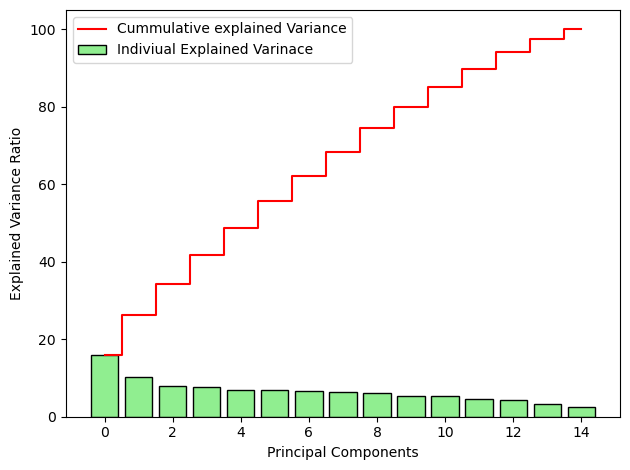

In [32]:
## Scree plot
plt.bar(range(15),var_exp, align='center',color='lightgreen',edgecolor='black',label='Indiviual Explained Varinace')
plt.step(range(15), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

- We can see that approximately 80.0% of variance is explained by the first 10 variables.
- so, we can choose the optimal number of principal components as 10.

In [33]:
## Fitting the PCA model
pca=PCA(n_components = 10)
pca.fit(scaled_features_df)

PCA(n_components=10)

In [34]:
data_pca = pca.transform(scaled_features_df)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.863405,1.616243,0.604286,0.780499,0.232403,0.167807,-0.638376,0.830357,0.769600,1.673673
1,0.740996,0.737776,0.073456,-0.660453,-0.309406,-0.091730,0.176715,-1.149435,0.736648,0.135785
2,1.333525,0.227786,1.413957,-0.097731,0.574525,0.628063,-1.699970,0.379289,-1.328221,-0.151213
3,1.620595,-0.491519,-0.219290,1.604197,0.079296,0.008933,-0.342345,-0.947008,0.121129,0.800066
4,-2.109267,-1.732279,0.101220,-0.623730,-0.175897,0.092863,0.280105,-0.719828,0.701509,-0.652690


## K-means Clustering

### Q15. Apply k-means and try to find the optimal number of clusters.

In [35]:
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(data_pca)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,1,24236.961659
1,2,20735.563484
2,3,18827.627540
3,4,17150.103891
4,5,16007.822394
5,6,14620.610846
6,7,13237.772336
7,8,12506.991301
8,9,11656.501075
9,10,11059.424359


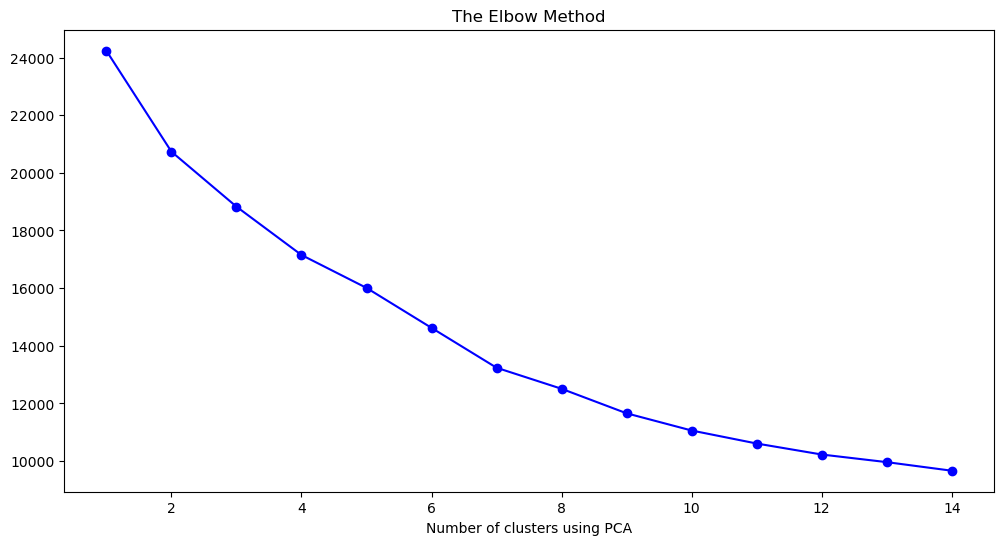

In [36]:
## Elbow method
plt.figure(figsize=[12,6])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters using PCA')
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

- From the Elbow plot, we can see that at K=6 the interia starts to drop significantly. So we will do it using 6 clusters. 
- The clusters are labeled as 0,1,2,3,4,5.

In [37]:
## Fit the KMeans clustering model using the obtained optimal K
kmeans = KMeans(n_clusters=6, n_init=15, random_state=2345)
kmeans.fit(data_pca)

KMeans(n_clusters=6, n_init=15, random_state=2345)

In [38]:
## obtained labels from kmeans clustering
kmeans.labels_

array([1, 2, 2, ..., 0, 0, 3])

In [39]:
## Creating a new dataframe only for labels.
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))
df_labels.head(5)

,Labels
0,1
1,2
2,2
3,2
4,0


### Q16. Compute Silhoutte Score for validating the best optimal number of clusters.

In [48]:
from sklearn.metrics import silhouette_score

kmeans_score = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(data_pca)
    labels = kmeans.predict(data_pca)
    print(i,silhouette_score(data_pca,labels))

2 0.1594448101372918
3 0.1699457918702015
4 0.17790953201562487
5 0.1956413624483714
6 0.17817609044791446
7 0.1932208113561643
8 0.16698118739612097
9 0.17557502593593577
10 0.17633568769139332
11 0.15562344016173138
12 0.16470261349296839
13 0.16566351678853158
14 0.17219082247000164


 - From above, we can observe that for 6 clusters the silhoutte score is highest, we can choose optimal clusters as 6.

## Agglomertaive Clustering

### Q17. Use dendrograms and find the number of classes in the dataset. 

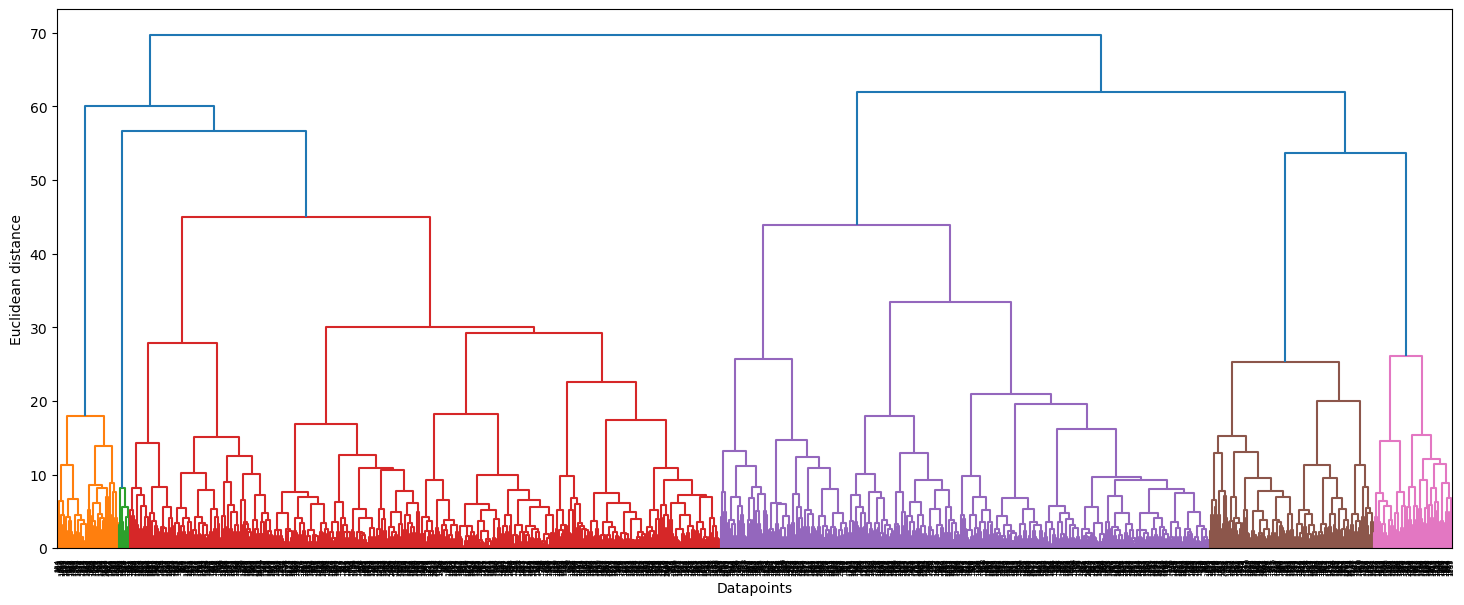

In [42]:
plt.figure(figsize=[18,7])
merg = linkage(data_pca, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [43]:
## Building hierarchical clustering model using the optimal clusters as 4
hie_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(data_pca)

In [44]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,1
1,0
2,0
3,2
4,2


### Q18. Compute Silhoutte Score for validating the best optimal number of classes.

In [45]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(data_pca)
    labels = hier.fit_predict(data_pca)
    print(i,silhouette_score(data_pca,labels))

2 0.11568625084502149
3 0.11895791012524089
4 0.13906880913741992
5 0.1462721918207639
6 0.16752252631122214
7 0.16305694091866804
8 0.16559886573943602
9 0.1467612478643382
10 0.11792855939055367
11 0.11064008844181297
12 0.12055909485804854
13 0.12471476850848551
14 0.13189809619632617


- From above, we can observe that the silhouette score is highest for 6.

## Conclustion

- In this case study, we have attempted to cluster adult census dataset using K-means and agglomerative clustering and we also reduced the dimensionality of the dataset using PCA.
- We came up with 6 clusters using K-means and 4 classes using agglomerative clustering.
- Although selection of the clusters can be revised using Silhoutte score but for a general introductory part it is okay to visualize the plot (either elbow graph or dendrograms) and come up with a particular clusters size.
- Further, we can also do the cluster analysis by doing bivariate analysis between cluster labels and different features and understand the characteristics of different groups.

-----
## Happy Learning
-----